## Bag of Words for Image Classification

Bag of words can not only be used to featurize text - we can also use it on images for classification problems. In this assignment you will be classifying a subset of images from the CIFAR-10 dataset using SIFT featurization on images, and K-means clustering in order to construct a vocabulary of image features with which we can implement the bag of words model.

insert[

## Import/Install Dependencies

In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade tensorflow

In [63]:
from matplotlib import pyplot
import cv2
import pysift
import numpy as np
from scipy.cluster.vq import *
from keras.datasets import cifar10
from sklearn.svm import LinearSVC


In [84]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [128]:
Xtrain = []
ytrain = []
count1 = 0
count7 = 0
count8 = 0
num_data = 2000
for i in range(len(trainX)):
    if trainy[i] == 1 and count1 < num_data:
        Xtrain.append(trainX[i])
        ytrain.append(trainy[i])
        count1 += 1
    if trainy[i] == 8 and count8 < num_data:
        Xtrain.append(trainX[i])
        ytrain.append(trainy[i])
        count8 += 1
    if trainy[i] == 7 and count7 < num_data:
        Xtrain.append(trainX[i])
        ytrain.append(trainy[i])
        count7 += 1
    if count1 == count8 == count7 == num_data:
        break
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

Xtest = []
ytest = []
count1 = 0
count7 = 0
count8 = 0
for i in range(len(testX)):
    if testy[i] == 1 and count1 < 100:
        Xtest.append(testX[i])
        ytest.append(testy[i])
        count1 += 1
    if trainy[i] == 8 and count8 < 100:
        Xtest.append(testX[i])
        ytest.append(testy[i])
        count8 += 1
    if trainy[i] == 7 and count7 < 100:
        Xtest.append(testX[i])
        ytest.append(testy[i])
        count7 += 1
    if count1 == count8 == count7 == 100:
        break
Xtest = np.array(Xtest)
ytest = np.array(ytest)


Train: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(300, 32, 32, 3), y=(300, 1)
[1]
[1]
[7]
[8]
[7]
[7]
[1]
[7]
[7]


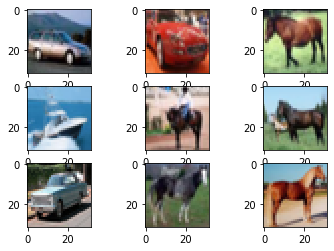

In [129]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(Xtrain[i])
    print(ytrain[i])
# show the figure
pyplot.show()

this will take ~ 15 minutes to run

In [130]:
def generate_descriptors(X):
    '''
    Generate list of all SIFT features found in images using pysify.computeKeypointsAndDescriptors
    and mapping from image index to descriptors for that image
    '''
    image_map = {}
    meaned = np.mean(X[0], axis=2)
    keypoints, descriptors = pysift.computeKeypointsAndDescriptors(meaned)
    image_map[0] = descriptors
    X_feat = descriptors[0]
    for descriptor in descriptors[1:]:
        X_feat = np.vstack((X_feat, descriptor))
    for i in range(1, len(X)):
        if i % 100 == 0:
            print(i)
        meaned = np.mean(X[i], axis=2)
        keypoints, descriptors = pysift.computeKeypointsAndDescriptors(meaned)
        image_map[i] = descriptors
        for descriptor in descriptors:
            X_feat = np.vstack((X_feat, descriptor))
    return X_feat, image_map

In [ ]:
Xtrain_feat, Xtrain_image_map = generate_descriptors(Xtrain)

## Bag of Words
We need to create a vocabulary from the list of descriptors in order to create bag of words features for each image. One approach is to use k-means clustering on the list of descriptors, and for each cluster of descriptors to define a "word". You may find the scipy.cluster.vq kmeans and vq functions useful in the implementation of bag of words featurizing the images.

In [96]:
def generate_vocab(X_feat, k):
    '''
    Use kmeans on the descriptors with a given number of clusters to generate a vocabulary of SIFT features
    '''
    vocab, variance = kmeans(X_train, k, 1) 
    return vocab

def bag_of_words_featurize(image_map, k, vocab):
    '''
    Use bag of words and the given vocabulary to featurize all images using 
    '''
    im_features = np.zeros((len(image_map.keys()), k), "float32")
    for i in range(len(image_map.keys())):
        words, distance = vq(image_map[i],vocab)
        for w in words:
            im_features[i][w] += 1
    return im_features


In [121]:
k = 50
vocab = generate_vocab(Xtrain_feat, k)
Xtrain_featurized = bag_of_words_featurize(Xtrain_image_map, k, vocab)
##sliders

In [122]:
clf = LinearSVC()
clf.fit(Xtrain_featurized, np.array(ytrain[:len(Xtrain_featurized)]))

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [123]:
clf.score(Xtrain_featurized, np.array(ytrain[:len(Xtrain_featurized)]))

0.64

In [124]:
def test_model(clf, im_features, ytest):
    return clf.score(im_features, np.array(ytest[:len(im_features)]))

In [125]:
Xtest_feat, Xtest_image_map = generate_descriptors(Xtest)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [127]:
for k in range(5, 200, 5):
    vocab = generate_vocab(Xtrain_feat, k)
    Xtrain_featurized = bag_of_words_featurize(Xtrain_image_map, k, vocab)
    clf = LinearSVC()
    clf.fit(Xtrain_featurized, np.array(ytrain[:len(Xtrain_featurized)]))
    Xtest_featurized = bag_of_words_featurize(Xtest_image_map, k, vocab)
    score = test_model(clf, Xtest_featurized, ytest)
    print(score)

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.30333333333333334


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3333333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3433333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.35


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.34


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.33


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.33666666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.32


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3566666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3233333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.32


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3466666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.29


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.30333333333333334


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31333333333333335


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3233333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31333333333333335


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.29333333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.28


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2966666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.29


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31666666666666665


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33666666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.26


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2966666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2866666666666667


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2733333333333333


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.31


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2866666666666667
0.30666666666666664


C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
